# TITANIC SURVIVAL PREDICTION

## Project Overview

Build a model that predicts whether a passenger on the Titanic survived or not. The goal is to uncover patterns in the data that contribute to survival outcomes during the Titanic disaster.

## Problem Statement

Create a machine learning model that predicts the probability of survival for Titanic passengers. Explore and model the connections among various attributes like age, gender, class, fare, and cabin to effectively determine whether a passenger survived the Titanic disaster. The objective of this project is to provide valuable insights into the key factors influencing passenger survival, utilizing historical data for predictive analysis. The ultimate aim is to establish a reliable model applicable to analogous situations, enhancing risk evaluation and safety protocols within the travel sector.

## Evaluation of metrics

Aligned with the primary project goal of predicting passenger survival, the model's effectiveness will be evaluated through the following metric: Accuracy. This metric gauges the overall correctness of the survival predictions.

## Data Understanding
The Titanic dataset, consisting of 418 entries and 12 columns, provides information about passengers aboard the Titanic during its ill-fated voyage. Key columns include:

PassengerId: Unique identifier for each passenger.

Survived: Binary variable indicating survival (1 for survived, 0 for not survived).

Pclass: Ticket class (1st, 2nd, or 3rd).

Name: Name of the passenger.

Sex: Gender of the passenger.

Age: Age of the passenger (with some missing values).

SibSp: Number of siblings or spouses aboard.

Parch: Number of parents or children aboard.

Ticket: Ticket number.

Fare: Fare paid for the ticket (with a missing value).

Cabin: Cabin number (with several missing values).

Embarked: Port of embarkation (C for Cherbourg, Q for Queenstown, S for Southampton).

The dataset captures details of passengers and circumstances related to the Titanic disaster. The project aims to leverage this data to predict passenger survival.

# Data Preprocessing

   ## Step 1: Loading & Exploring the data

In [84]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [85]:
# Load the dataset
ds = pd.read_csv("Titanic-Dataset.csv")
print(ds)

# Explore the dataset
print(ds.head())  # View the first few rows

# Get information about data types and missing values
print(ds.info())
print(ds.isnull().sum())

print(ds.describe())  # Get descriptive statistics
ds.shape # Display the number of row and column

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

(891, 12)

## Step 2: Handle missing values and Data Cleaning

To ensure the development of a robust and accurate model, several data cleaning techniques will be applied to the dataset. The following techniques will be employed:

#### 1. Completeness: 
This method entails dealing with missing values in the dataset. Procedures will be implemented to identify and manage missing data effectively, employing either imputation or removal, to guarantee the completeness of the dataset.

#### 2. Consistency: 
The data's consistency will be scrutinized to detect any discrepancies or anomalies. Inconsistencies in variables, such as conflicting formats or contradictory information within the dataset, will be identified and resolved to uphold data integrity.

#### 3. Validity: 
Validity pertains to the accuracy and relevance of the data. Data validation techniques will be employed to confirm that the values within each variable adhere to anticipated ranges or predefined criteria. Any invalid or erroneous data points will be corrected or excluded from the dataset.

#### 4. Uniformity: 
Uniformity plays a pivotal role in the data cleaning process to guarantee consistency and accurate analysis. Inconsistent or non-uniform data can introduce errors and bias into the modeling process, potentially yielding unreliable results. Robust techniques will be implemented to identify and address non-uniformity effectively, ensuring that the data is standardized and aligned.

By applying these data cleaning techniques, the dataset will be refined and prepared, ensuring the reliability and accuracy of the data before proceeding with the subsequent stages of analysis and modeling.

### 1. Completeness

In [86]:
# Count the missing values
print(ds.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


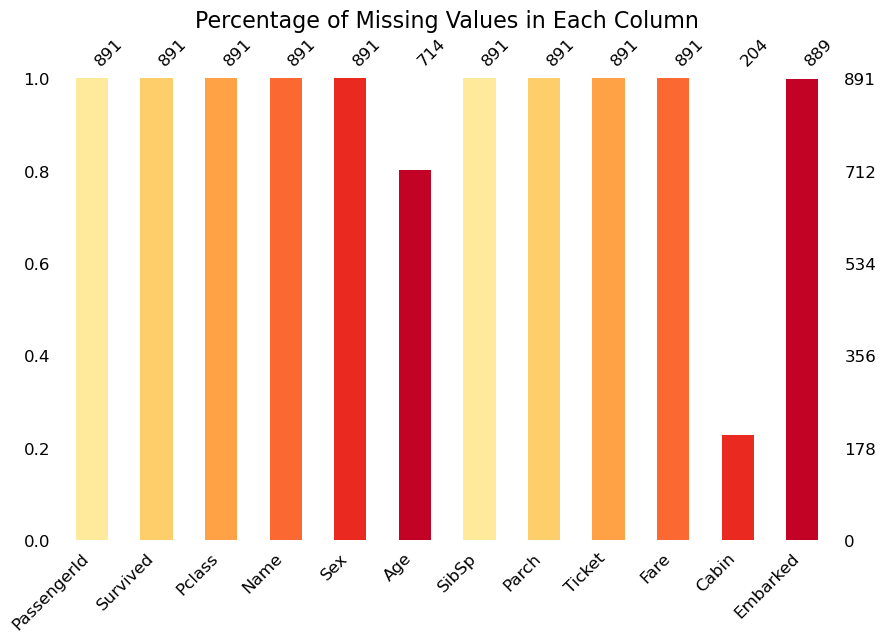

In [87]:
# Visualize the missing values
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
custom_palette = sns.color_palette("YlOrRd")

# Plot the bar chart with the custom color palette
msno.bar(ds, figsize=(10, 6), color=custom_palette, fontsize=12)

# Add title and customize the plot
plt.title('Percentage of Missing Values in Each Column', fontsize=16)
plt.show()

There are 3 columns with missing values which are `Age, Cabin and Embarked`. Imputation method will be used to handle missing values in Age and Embarked columns

In [88]:
# Fill missing ages with mean
ds["Age"].fillna(ds["Age"].mean(), inplace=True)

# Drop rows with missing Embarked values for simplicity
ds = ds.dropna(subset=['Embarked'])

# Dropping the Cabin column
ds = ds.drop(['Cabin'], axis=1) 

#checking to see if the missing values are still there
print(ds.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


I have filled the missing values in age with the mean and removed the missing values in Embarked. The Cabin column has a significant proportion of missing values, approximately 78% (687 out of 891). Considering the high percentage, we drop this column from analysis.

### 2. Consistency

In [89]:
# checking for duplicates
print(f'The data has {ds.duplicated().sum()} duplicates')

The data has 0 duplicates


##### The data has no `duplicates` hence it's consistent.

### 3. Validity

1. `Validating Numerical Values:`

We can use statistical methods to identify values that fall outside expected ranges or criteria.

In [90]:
# Validating numerical columns ('Age', 'Fare')
# Define expected ranges or criteria
age_range = (0, 100)  # Example age range
fare_range = (0, float('inf'))  # Example fare range

# Check for values outside the expected ranges
invalid_age_values = ds.loc[~ds['Age'].between(*age_range), 'Age']
invalid_fare_values = ds.loc[~ds['Fare'].between(*fare_range), 'Fare']

# Display the invalid values
print("Invalid Age Values:")
print(invalid_age_values)

print("\nInvalid Fare Values:")
print(invalid_fare_values)

Invalid Age Values:
Series([], Name: Age, dtype: float64)

Invalid Fare Values:
Series([], Name: Fare, dtype: float64)


##### There are no invalid values for the Age and Fare columns based on the specific validity criteria we checked.

2. `Validating Categorical Values:`

For categorical variables, we define a set of valid categories and identify any values that do not match.

In [91]:
# Validating categorical columns ('Sex', 'Embarked')
# Define valid categories
valid_sex_categories = {'male', 'female'}
valid_embarked_categories = {'C', 'Q', 'S'}

# Check for values not in the valid categories
invalid_sex_values = ds.loc[~ds['Sex'].isin(valid_sex_categories), 'Sex']
invalid_embarked_values = ds.loc[~ds['Embarked'].isin(valid_embarked_categories), 'Embarked']

# Display the invalid values
print("Invalid Sex Values:")
print(invalid_sex_values)

print("\nInvalid Embarked Values:")
print(invalid_embarked_values)

Invalid Sex Values:
Series([], Name: Sex, dtype: object)

Invalid Embarked Values:
Series([], Name: Embarked, dtype: object)


#### There are no invalid values for the Sex and Embarked columns based on the specific validity criteria we checked.

### 4. Uniformity

Column: Sex
Unique Values: ['male' 'female']
Value Counts:
 Sex
male      577
female    312
Name: count, dtype: int64
----------------------------


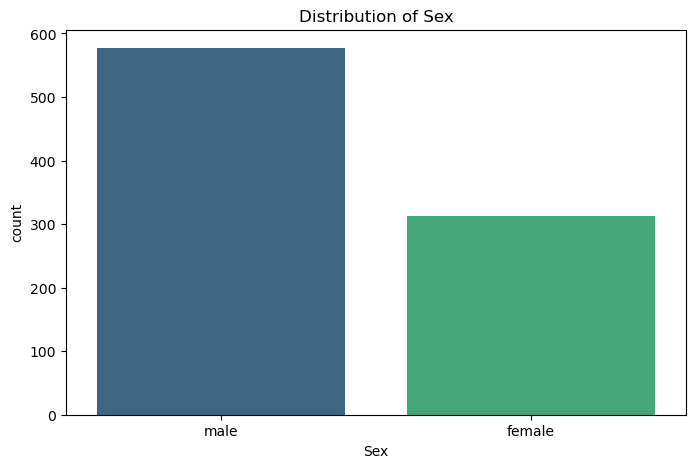

Column: Embarked
Unique Values: ['S' 'C' 'Q']
Value Counts:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
----------------------------


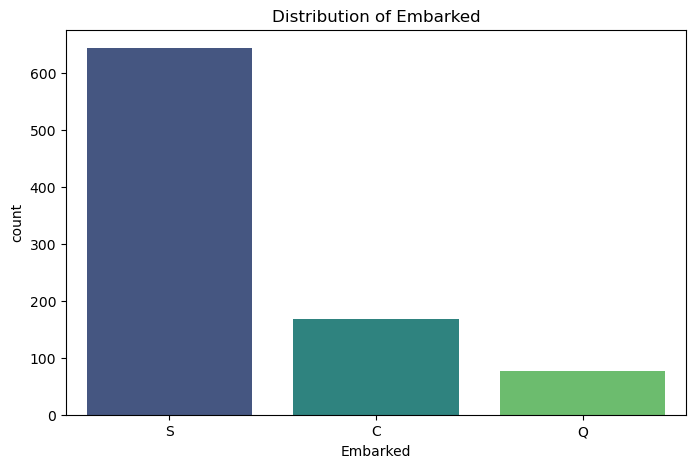

Column: Survived
Unique Values: [0 1]
Value Counts:
 Survived
0    549
1    340
Name: count, dtype: int64
----------------------------


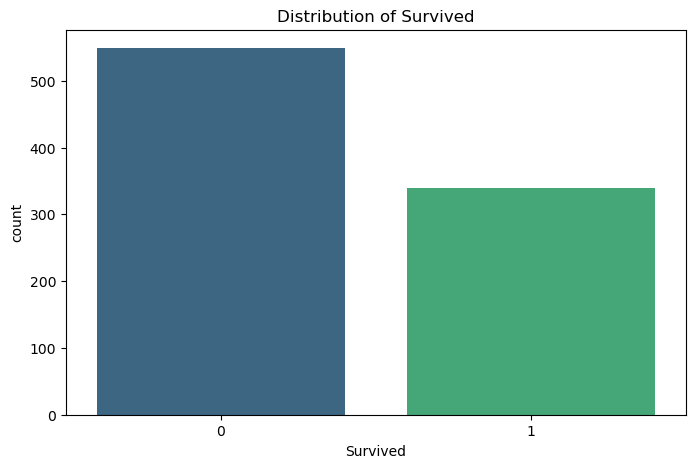

In [92]:
#creating a function to check for uniformity 
def check_uniformity(dataset, columns):
    for column in columns:
        unique_values = dataset[column].unique()
        value_counts = dataset[column].value_counts()

        print(f"Column: {column}")
        print("Unique Values:", unique_values)
        print("Value Counts:\n", value_counts)
        print("----------------------------")

        # Plot a bar chart for value counts
        plt.figure(figsize=(8, 5))
        sns.countplot(x=dataset[column], palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.show()

# Specify the columns you want to check for uniformity
columns_to_check = ['Sex', 'Embarked', 'Survived']

# Call the function
check_uniformity(ds, columns_to_check)

##### The `Sex`, `Embarked` and `Survived` columns appear to be uniform, with consistent and expected values. There is no indication of irregularities or unexpected variations in these categorical columns based on the provided output

## Step 3: Feature Engineering

Creating categorical variable for traveling alone and label encoding

In [93]:
from sklearn.preprocessing import LabelEncoder

# Creating a new feature/column called family size
ds["FamilySize"] = ds["SibSp"] + ds["Parch"]

# Creating a feature indicating if passenger is traveling alone and 
# map the values to create a binary 'IsAlone' column (1 if traveling alone, 0 if not)
ds["IsAlone"] = ds["FamilySize"].map(lambda x: 1 if x == 0 else 0)

# Apply label encoding to the 'IsAlone' column
label_encoder = LabelEncoder()
ds['IsAlone'] = label_encoder.fit_transform(ds['IsAlone'])

# Display the updated DataFrame
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,1


##### Dropping the irrelevant columns

In [94]:
# In our data the Ticket and passengerID, Name, sibsp and parch are irrelevant data,thus causes false prediction
ds.drop(['SibSp', 'Parch', 'PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

# Display the updated DataFrame
ds.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,7.2500,S,1,0
1,1,1,female,38.0,71.2833,C,1,0
2,1,3,female,26.0,7.9250,S,0,1
3,1,1,female,35.0,53.1000,S,1,0
4,0,3,male,35.0,8.0500,S,0,1


In [95]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    object 
 3   Age         889 non-null    float64
 4   Fare        889 non-null    float64
 5   Embarked    889 non-null    object 
 6   FamilySize  889 non-null    int64  
 7   IsAlone     889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


## Exploration and Analysis
This section will be the exploratory data analysis question where we will exploring and seeing the relationship the between the different columns

The main two parts in this section are:

1. `Categorical Columns`

2. `Numerical Columns`

#### 1. Categorical Columns

The Categorical Columns in the dataset that we shall be analysing are:

- sex

- Embarked

#### 2. Numerical Columns

The Numerical Columns in the dataset that we shall be analysing are:

- Survived

- Pclass

- Age

- Fare

- FamilySize

- IsAlone

In [98]:
# Descriptive Statistics
ds.describe().round(2)

,Survived,Pclass,Age,Fare,FamilySize,IsAlone
count,889.00,889.00,889.00,889.00,889.00,889.00
mean,0.38,2.31,29.65,32.10,0.91,0.60
std,0.49,0.83,12.97,49.70,1.61,0.49
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,22.00,7.90,0.00,0.00
50%,0.00,3.00,29.70,14.45,0.00,1.00
75%,1.00,3.00,35.00,31.00,1.00,1.00
max,1.00,3.00,80.00,512.33,10.00,1.00


In [99]:
# Separate numerical and categorical columns
numerical_columns = ds.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = ds.select_dtypes(include=['object']).columns

### 1. Univariate Analysis

Univariate analysis is a statistical method that involves the analysis of a single variable at a time. In other words, it focuses on examining the distribution and characteristics of one variable without considering the relationship with other variables. The primary goal of univariate analysis is to describe and summarize the key features and patterns within a single variable.

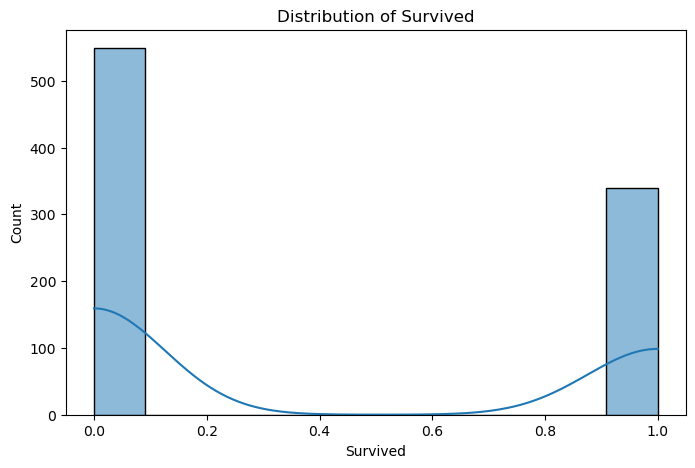

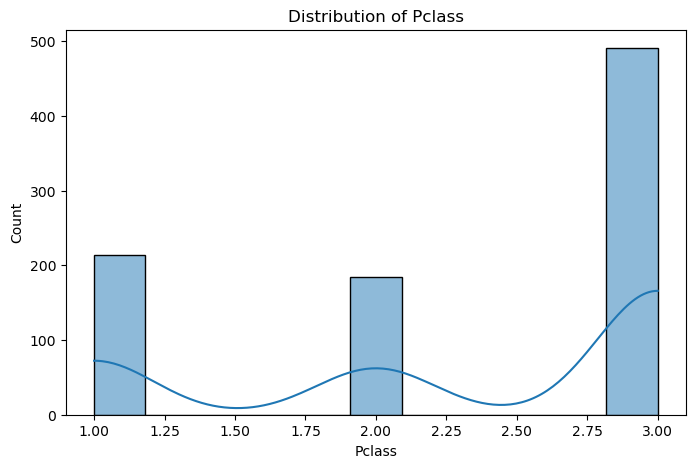

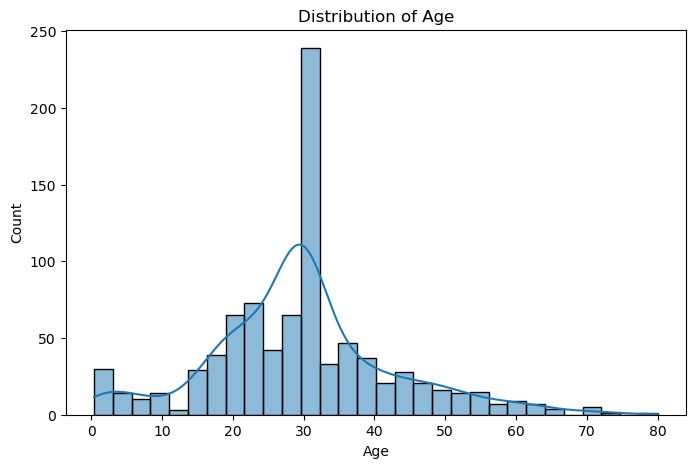

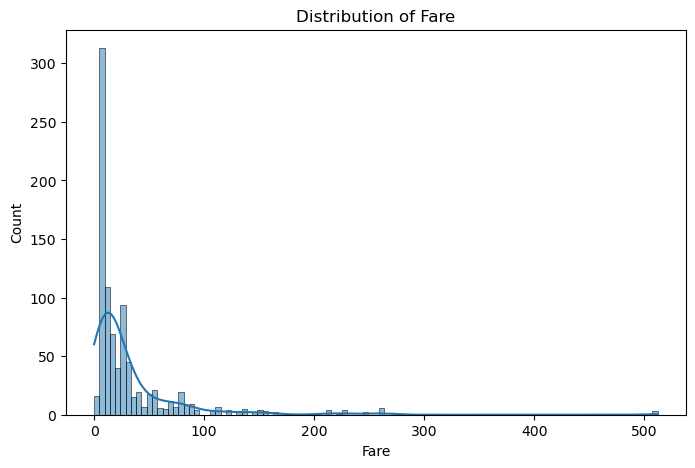

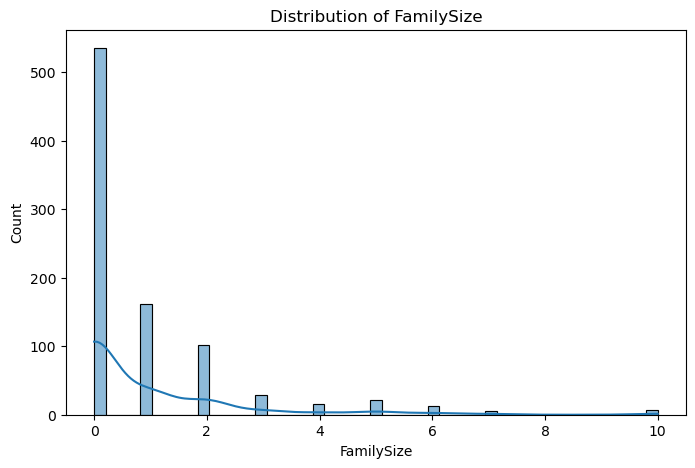

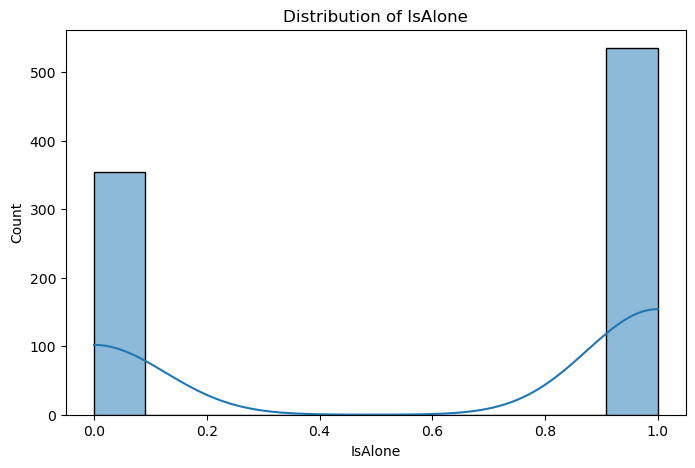

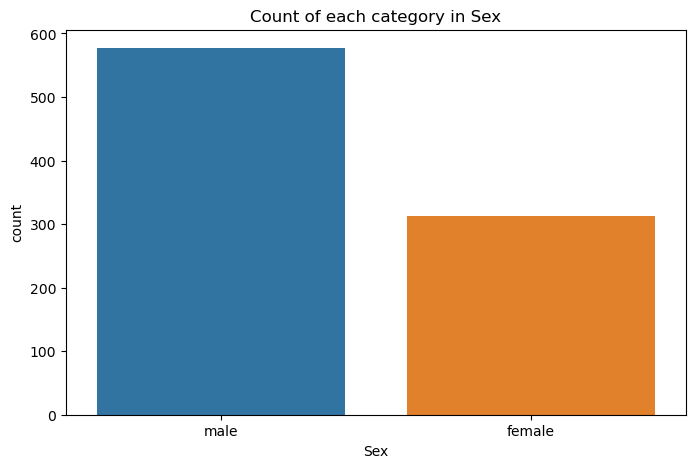

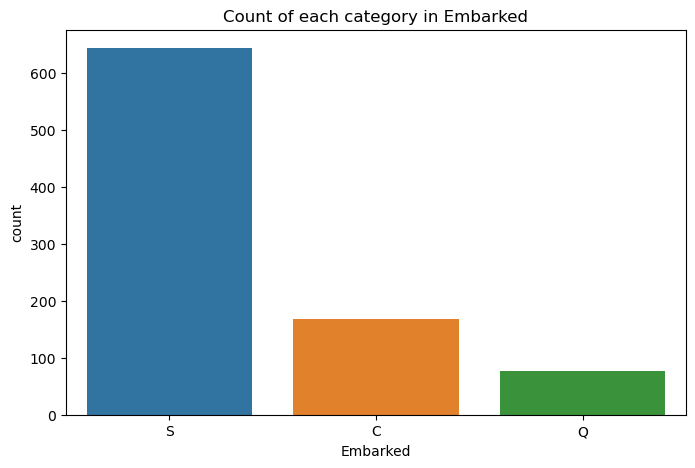

In [100]:
def univariate_analysis(dataframe):
    # Separate numerical and categorical columns
    numerical_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = dataframe.select_dtypes(include=['object']).columns

    # Univariate analysis for numerical variables
    for col in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(dataframe[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

    # Univariate analysis for categorical variables
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=dataframe[col])
        plt.title(f'Count of each category in {col}')
        plt.show()

# Example usage with your DataFrame 'df'
univariate_analysis(ds)

`Survived:`

Conclusion: The dataset is imbalanced, with a larger representation of non-survivors (0) compared to survivors (1).

`Pclass:`

Conclusion: The dataset predominantly comprises passengers in the third class (Pclass=3), suggesting a higher population while the second class (Pclass=3) has the lowest population.

`Age:`

Conclusion: The age distribution is varied, with a notable concentration of passengers in the young adult age range.

`Fare:`

Conclusion: The majority of passengers paid lower fares, but there is a long tail suggesting some passengers paid significantly higher fares, this depends with the class.

`FamilySize:`

Conclusion: The majority of passengers traveled with their family that is siblings and spouses.

`IsAlone:`

Conclusion: More passengers traveled with companions (TravelAlone=0) than those who traveled alone (TravelAlone=1).

`Sex:`

Conclusion: The dataset is predominantly composed of male passengers.

`Embarked:`

Conclusion: The majority of passengers boarded the Titanic from Southampton (S), with Cherbourg (C) as the second most common embarkation port.

In [102]:
# apply log transformation to fare column to reduce skweness 
ds['Fare'] = ds['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

### 2. Bivariate Analysis

Bivariate analysis involves the simultaneous analysis of two variables to understand the relationships between them

### Is there a relationship between Gender (Sex) and Survival?

<Axes: xlabel='Sex', ylabel='count'>

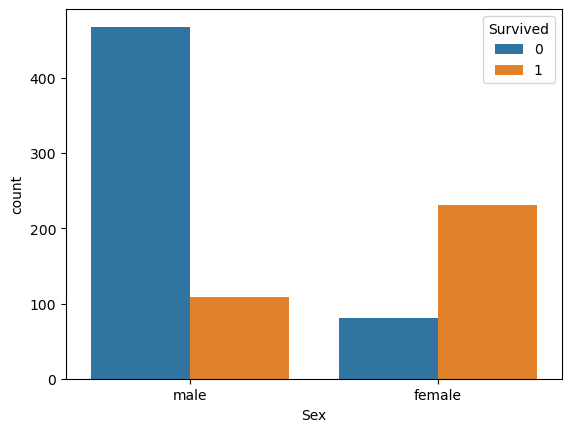

In [104]:
sns.countplot(x='Sex', hue='Survived', data=ds)

`Conclusion:` A greater percentage of male passengers survived in comparison to their female counterparts. The count plot illustrates this disparity, hinting that factors beyond gender may have exerted a more substantial influence on survival outcomes.

### What is the influence of age on the probability of survival?

In [106]:
#Create a new column called age bracket
# Define age bins and labels
age_bins = [0, 12, 18, 25, 35, 45, 65, float('inf')]
age_labels = ['0-12 years old', '12-18 years old', '18-25 years old', '25-35 years old', '35-45 years old', '45-65 years old', '65+ years old']

# Create the 'AgeBracket' column
ds['AgeBracket'] = pd.cut(ds['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the updated DataFrame
ds.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,AgeBracket
0,0,3,male,22.0,1.981001,S,1,0,18-25 years old
1,1,1,female,38.0,4.266662,C,1,0,35-45 years old
2,1,3,female,26.0,2.070022,S,0,1,25-35 years old
3,1,1,female,35.0,3.972177,S,1,0,35-45 years old
4,0,3,male,35.0,2.085672,S,0,1,35-45 years old


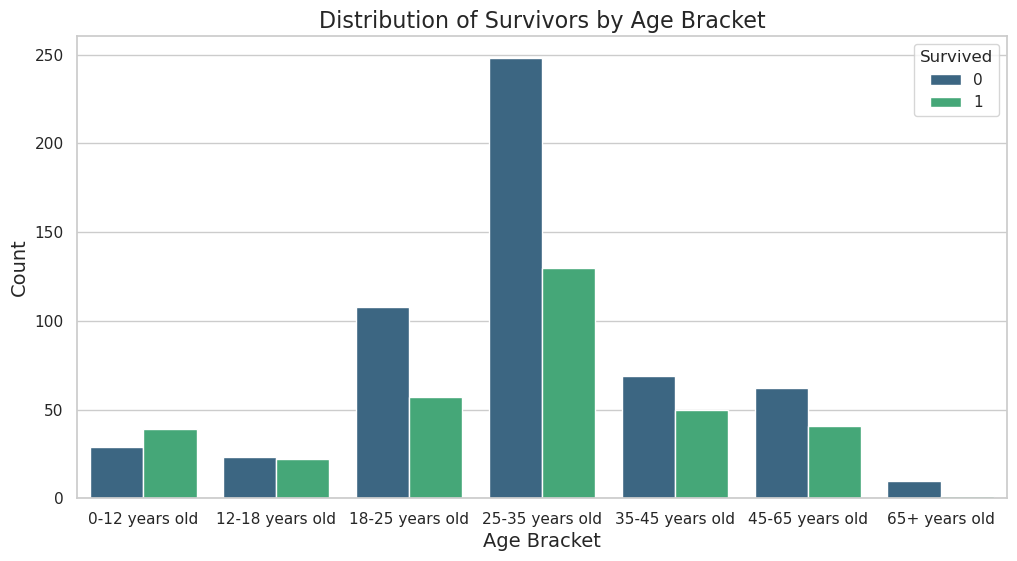

In [108]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeBracket', hue='Survived', data=ds, palette='viridis')

# Set the title and labels
plt.title('Distribution of Survivors by Age Bracket', fontsize=16)
plt.xlabel('Age Bracket', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

`Conclusion:` Age played a role in survival, with a higher likelihood for children (0-12 years old). The distribution for middle-aged passengers (35-65 years old) also leans towards a higher count of non-survivors, as their were no survivors in seniors (65+ years old). The most survivors came from the youths (25-35 years old)

### Is there any correlation between Fare and Survival?

<Axes: xlabel='Survived', ylabel='Fare'>

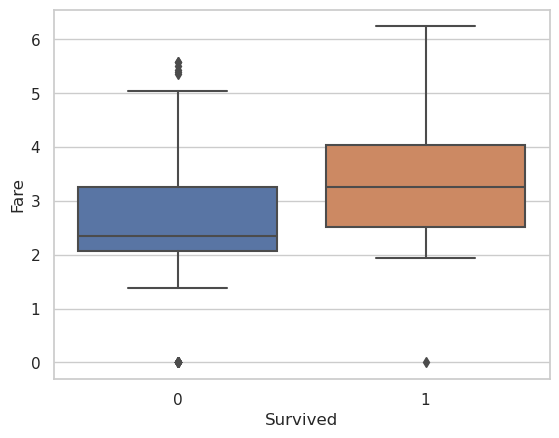

In [109]:
sns.boxplot(x='Survived', y='Fare', data=ds)

`Conclusion:` A correlation seems to exist between fare and survival, as survivors tend to be linked with higher fare values.

### Does the Port of Embarkation (Embarked) influence Survival?

<Axes: xlabel='Embarked', ylabel='count'>

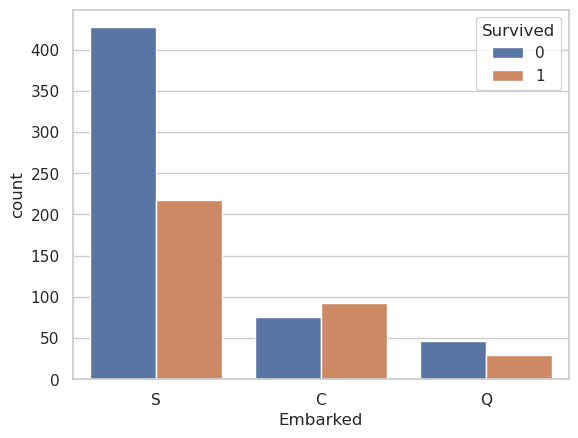

In [117]:
sns.countplot(x='Embarked', hue='Survived', data=ds)

`Conclusion:` Survival results appear to differ depending on the port of embarkation, with passengers from Southampton exhibiting higher counts in both survival and non-survival categories.

### Does Ticket Class (Pclass) influence Survival?

<Axes: xlabel='Pclass', ylabel='count'>

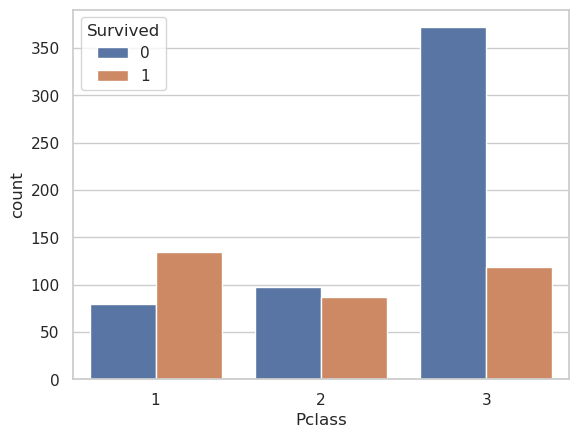

In [119]:
sns.countplot(x='Pclass', hue='Survived', data=ds)

Conclusion: There seems to be a correlation between Pclass and survival, as a higher percentage of survivors is observed in the 1st class and a lower percentage in the 3rd class.

### 3. Multivariate Analysis

Multivariate Analysis is a statistical technique that involves the simultaneous analysis of multiple variables to understand the relationships and patterns among them. Allows analysts to explore the complex interactions between two or more variables in a dataset. Our aim here is to look for the relationship between different features.